### Newton's method

Find roots with **Newton's method** for:


1) $\:f(x) = x\,cos(x) - x^2 \:\:\:  x_0 = 1$

2) $\:f(x) = x^3 - 7x^2 + 8x - 3 \:\:\: x_0 = 5 $

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

In [3]:
sess = tf.Session(config=config)

In [4]:
X = np.linspace(-10, 10, 100)

In [5]:
x = tf.placeholder(tf.float32, name="x")
y = x * tf.cos(x) - x ** 2

In [6]:
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

In [7]:
grad_by_hand = tf.cos(x) - x * tf.sin(x) - 2 * x

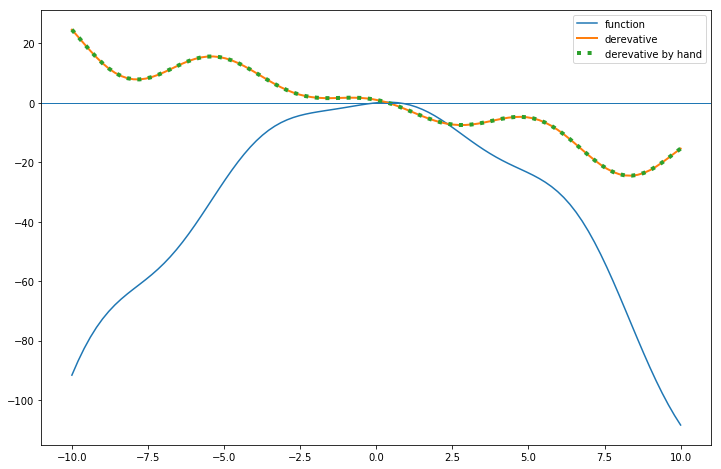

In [8]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.plot(X, sess.run(grad_by_hand, {x: X}), ":", lw=4, label="derevative by hand")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [9]:
iterations = 10
xs1 = [-2.5]

for _ in range(iterations):
    current_x = xs1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs1.append(next_x)
    
xs2 = [5]

for _ in range(iterations):
    current_x = xs2[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs2.append(next_x)

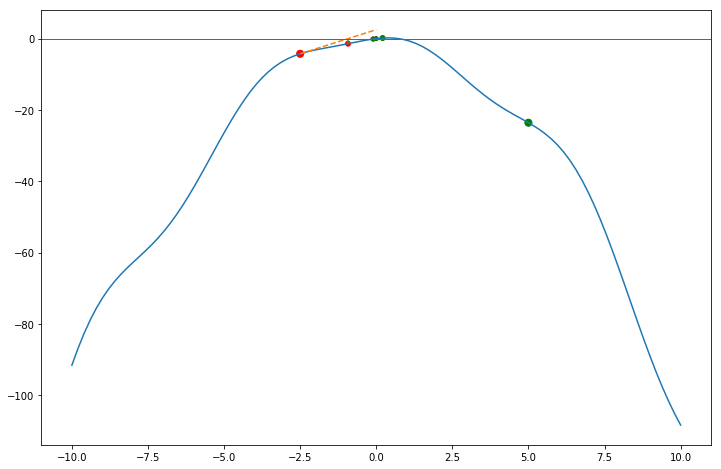

In [10]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.scatter(xs1, sess.run(y, {x: xs1}), s = 50/np.arange(1, 1+len(xs1)), c="red")

x0, y0, k = xs1[0], sess.run(y, {x: xs1[0]}), sess.run(grad_y[0], {x: xs1[0]})
plt.plot([x0, 0], [y0, y0 + k * (0 - x0)], "--")
plt.plot([xs1[1], xs1[1]], [0, sess.run(y, {x: xs1[1]})], "--")

plt.scatter(xs2, sess.run(y, {x: xs2}), s = 50/np.arange(1, 1+len(xs2)), c="green")

plt.axhline(y=0, linewidth=1)

In [11]:
print("root 1:", xs1[-10],"\nroot 2:", xs2[1])

root 1: -0.9285423755645752 
root 2: 0.20864534378051758


In [12]:
sess.close()
tf.reset_default_graph()
sess = tf.Session(config=config)

In [13]:
!rm log/* -rf
writer = tf.summary.FileWriter('log/')

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

In [15]:
sess = tf.Session(config=config)

In [16]:
X = np.linspace(-5, 10, 100)

In [17]:
x = tf.placeholder(tf.float32, name="x")
y = x ** 3 - 7 * x ** 2 + 8 * x - 3

In [18]:
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

In [19]:
grad_by_hand = 3 * x ** 2 - 14 * x + 8

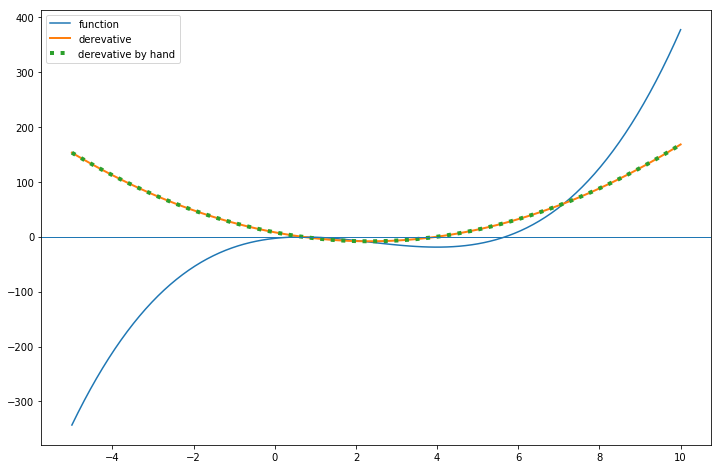

In [20]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.plot(X, sess.run(grad_by_hand, {x: X}), ":", lw=4, label="derevative by hand")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [21]:
iterations = 10
xs1 = [-3]

for _ in range(iterations):
    current_x = xs1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs1.append(next_x)
    
xs2 = [8]

for _ in range(iterations):
    current_x = xs2[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs2.append(next_x)

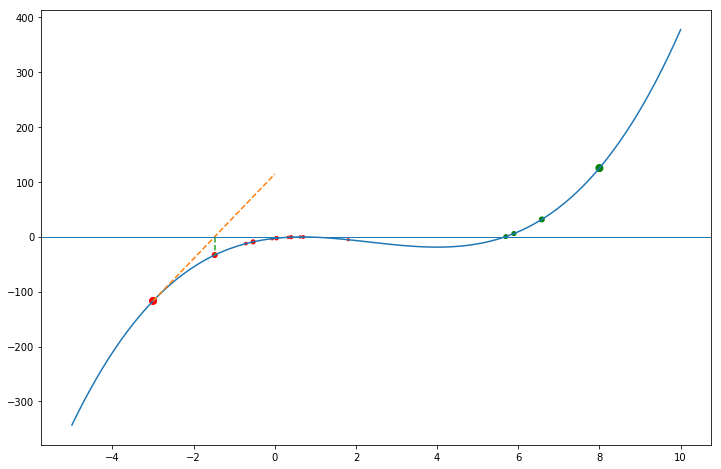

In [22]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.scatter(xs1, sess.run(y, {x: xs1}), s = 50/np.arange(1, 1+len(xs1)), c="red")

x0, y0, k = xs1[0], sess.run(y, {x: xs1[0]}), sess.run(grad_y[0], {x: xs1[0]})
plt.plot([x0, 0], [y0, y0 + k * (0 - x0)], "--")
plt.plot([xs1[1], xs1[1]], [0, sess.run(y, {x: xs1[1]})], "--")

plt.scatter(xs2, sess.run(y, {x: xs2}), s = 50/np.arange(1, 1+len(xs2)), c="green")

plt.axhline(y=0, linewidth=1)

In [23]:
print("root 1:", xs1[-3],"\nroot 2:", xs2[7])

root 1: 0.3328811526298523 
root 2: 5.685779388273659


In [24]:
sess.close()
tf.reset_default_graph()
sess = tf.Session(config=config)

In [25]:
!rm log/* -rf
writer = tf.summary.FileWriter('log/')

'rm' is not recognized as an internal or external command,
operable program or batch file.


### Softmax

$$\text{softmax}(x)_i = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [26]:
def softmax(sess, x):
    """
    param sess: tf.Session
    param x:  np.array, n-dimentional vector
    returns: np.array n-dimentional vector
    """
    def softmax_func(x):
        return np.exp(x)/np.sum(np.exp(x))
    
    array = tf.placeholder(tf.float32)
    func = tf.py_func(func=softmax_func,inp=[x],Tout=tf.double)
    return sess.run(func, {array:x})

In [27]:
# test
import tensorflow as tf
import numpy as np

In [28]:
with tf.Session() as sess:
    if np.allclose([0.0320586, 0.08714432, 0.23688282, 0.64391426],
                   softmax(sess, np.array([1, 2, 3, 4]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!


In [29]:
sess.close()
tf.reset_default_graph()
sess = tf.Session(config=config)

In [30]:
!rm log/* -rf
writer = tf.summary.FileWriter('log/')

'rm' is not recognized as an internal or external command,
operable program or batch file.


$$\text{softmax}(X)_{ij} = \frac{\exp(X_{ij})}{\sum_j \exp(X_{ij})}$$

In [31]:
def softmax_matrix(sess, x):

    """
    Computes softmax for each row vector in matrix.
    
    param sess: tf.Session
    param x:  np.array, (n x m) matrix
    returns: np.array, (n x m) matrix
    """
    def softmax(x):
        per_item_min = np.amin(x, 1, keepdims=True)
        y = np.exp(x - per_item_min)
        normalization = np.sum(y, 1, keepdims=True)
        return y / normalization

   # def softmax(x):
   #     return np.array([np.exp(i)/np.sum(np.exp(i)) for i in x])

    array = tf.placeholder(tf.float32)
    func = tf.py_func(func=softmax,inp=[x],Tout=tf.double)
    return sess.run(func, {array:x})    

In [32]:
with tf.Session() as sess:
    if np.allclose([[0.10650698, 0.78698604, 0.10650698],
                    [0.09003057, 0.24472847, 0.66524096]],
                   softmax_matrix(sess, np.array([[1,3,1], [-1, 0, 1]]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!
